In [1]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster('local').setAppName('book')
spark = SparkContext(conf=conf).getOrCreate()

24/12/06 11:41:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
import os 

directory = os.path.join(os.getcwd(), 'data') # 경로 결합
filename = "Book"
file_path = os.path.join(directory, filename)

lines = spark.textFile("file:///" + file_path.replace("\\", "/"))

In [3]:
lines.take(3)

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane']

In [6]:
map_words = lines.map(lambda x:x.split())
map_words.take(3)

[['Self-Employment:', 'Building', 'an', 'Internet', 'Business', 'of', 'One'],
 ['Achieving',
  'Financial',
  'and',
  'Personal',
  'Freedom',
  'through',
  'a',
  'Lifestyle',
  'Technology',
  'Business'],
 ['By', 'Frank', 'Kane']]

In [7]:
words = lines.flatMap(lambda x:x.split())
words.take(5)

['Self-Employment:', 'Building', 'an', 'Internet', 'Business']

In [8]:
wordCounts = words.countByValue()
wordCounts

defaultdict(int,
            {'Self-Employment:': 1,
             'Building': 5,
             'an': 172,
             'Internet': 13,
             'Business': 19,
             'of': 941,
             'One': 12,
             'Achieving': 1,
             'Financial': 3,
             'and': 901,
             'Personal': 3,
             'Freedom': 7,
             'through': 55,
             'a': 1148,
             'Lifestyle': 5,
             'Technology': 2,
             'By': 9,
             'Frank': 10,
             'Kane': 7,
             'Copyright': 1,
             '�': 174,
             '2015': 3,
             'Kane.': 1,
             'All': 13,
             'rights': 3,
             'reserved': 2,
             'worldwide.': 2,
             'CONTENTS': 1,
             'Disclaimer': 1,
             'Preface': 1,
             'Part': 2,
             'I:': 2,
             'Making': 5,
             'the': 1176,
             'Big': 1,
             'Decision': 1,
             'Overcoming'

In [11]:
wordCounts.items()

dict_items([('Self-Employment:', 1), ('Building', 5), ('an', 172), ('Internet', 13), ('Business', 19), ('of', 941), ('One', 12), ('Achieving', 1), ('Financial', 3), ('and', 901), ('Personal', 3), ('Freedom', 7), ('through', 55), ('a', 1148), ('Lifestyle', 5), ('Technology', 2), ('By', 9), ('Frank', 10), ('Kane', 7), ('Copyright', 1), ('�', 174), ('2015', 3), ('Kane.', 1), ('All', 13), ('rights', 3), ('reserved', 2), ('worldwide.', 2), ('CONTENTS', 1), ('Disclaimer', 1), ('Preface', 1), ('Part', 2), ('I:', 2), ('Making', 5), ('the', 1176), ('Big', 1), ('Decision', 1), ('Overcoming', 1), ('Inertia', 1), ('Fear', 1), ('Failure', 1), ('Career', 1), ('Indoctrination', 2), ('The', 88), ('Carrot', 1), ('on', 399), ('Stick', 2), ('Ego', 1), ('Protection', 1), ('Your', 62), ('Employer', 2), ('as', 297), ('Security', 2), ('Blanket', 1), ('Why', 3), ('it�s', 28), ('Worth', 1), ('it', 311), ('Unlimited', 2), ('Growth', 4), ('Potential', 1), ('Investing', 3), ('in', 552), ('Yourself,', 1), ('Not', 

In [18]:
stop_words = {'a','an','the', 'and'}

In [22]:
filtered_word_counts = {k:v for k, v in wordCounts.items() if k.lower() not in stop_words 
                       and len(k) > 3}

In [9]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 162.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 160.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 141.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 79.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [31]:
top_words = sorted(filtered_word_counts.items(), key=lambda x:x[1], reverse=True)[:20]
top_words[:20]

[('your', 1339),
 ('that', 641),
 ('have', 299),
 ('with', 292),
 ('business', 261),
 ('will', 220),
 ('this', 208),
 ('they', 192),
 ('more', 187),
 ('about', 181),
 ('what', 177),
 ('need', 166),
 ('time', 165),
 ('from', 161),
 ("you're", 159),
 ('just', 131),
 ('product', 125),
 ('people', 122),
 ('their', 117),
 ('work', 114)]

In [32]:
from wordcloud import WordCloud

word_list = [word for word, count in top_words]
word_counts_list = [count for word, count in top_words]

<BarContainer object of 20 artists>

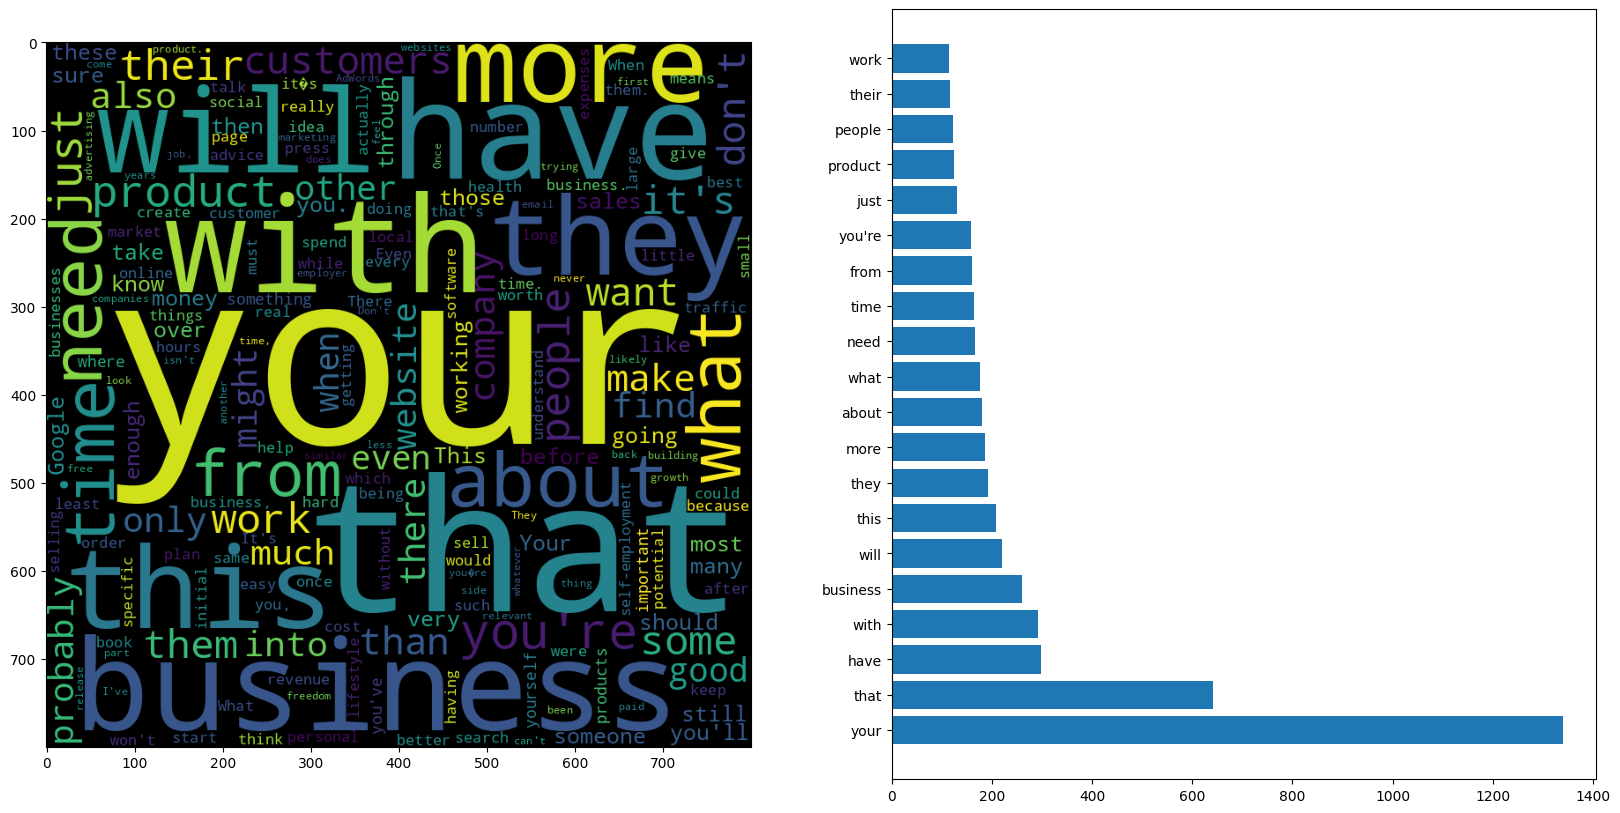

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
wc = WordCloud(width=800, height=800).generate_from_frequencies(filtered_word_counts)
plt.imshow(wc)

plt.subplot(1,2,2)
plt.barh(word_list, word_counts_list)

In [34]:
spark.stop()